# Chapter6 機械学習の基礎

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
from nltk.stem.porter import PorterStemmer as PS

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction import DictVectorizer

In [3]:
! ls

Chapter06.ipynb       NewsAggregatorDataset data


In [4]:
data = pd.read_csv("./NewsAggregatorDataset/newsCorpora.csv",sep="\t",header=None)

In [5]:
data.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7], dtype='int64')

### column名の追加

In [6]:
data.columns=['ID','TITLE','URL','PUBLISHER','CATEGORY','STORY','HOSTNAME','TIMESTAMP']

In [7]:
data.head()

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
0,1,"Fed official says weak data caused by weather,...",http://www.latimes.com/business/money/la-fi-mo...,Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,1394470370698
1,2,Fed's Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1394470371207
2,3,US open: Stocks fall after Fed official hints ...,http://www.ifamagazine.com/news/us-open-stocks...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371550
3,4,"Fed risks falling 'behind the curve', Charles ...",http://www.ifamagazine.com/news/fed-risks-fall...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371793
4,5,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,http://www.moneynews.com/Economy/federal-reser...,Moneynews,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,1394470372027


### 情報源の抽出

In [8]:
publisher={'Reuters', 'Huffington Post', 'Businessweek', 'Contactmusic.com', 'Daily Mail'}

In [9]:
data = data[data['PUBLISHER'].isin(publisher)]

In [10]:
data['PUBLISHER'].unique()

array(['Reuters', 'Businessweek', 'Huffington Post', 'Daily Mail',
       'Contactmusic.com'], dtype=object)

### ランダムな並び替え

In [11]:
data_shuffled = data.sample(frac=1, random_state=0)

In [12]:
data_shuffled.head()

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
310638,311098,RPT-Fitch Updates EMEA Consumer ABS Rating Cri...,http://in.reuters.com/article/2014/06/24/fitch...,Reuters,b,d3tIMfB2mg-9MZM4G_jGTEiRVl3jM,in.reuters.com,1403633888597
49197,49198,"Gurlitt Wants to Return Nazi-Looted Art, Suedd...",http://www.businessweek.com/news/2014-03-26/gu...,Businessweek,e,dWeC4g3bvX-bI6MKAcxt43Jp7MzSM,www.businessweek.com,1395886231417
410059,410578,"UPDATE 1-Fairfax Financial, CEO probed over po...",http://in.reuters.com/article/2014/08/01/fairf...,Reuters,b,d6s61cXf9rASExMO8inpkRujc9VTM,in.reuters.com,1406929609070
270222,270668,Angelina Jolie - Angelina Jolie Will Not Tight...,http://www.contactmusic.com/story/angelina-jol...,Contactmusic.com,e,d7SbUKanRaD34YMwE64lo09d_qCnM,www.contactmusic.com,1401828902205
301196,301656,Patent Officials Cancel the Washington Redskin...,http://www.businessweek.com/articles/2014-06-1...,Businessweek,b,dXVU3KhKpHSxleMNmc46pQj6e5zwM,www.businessweek.com,1403113194649


### trainとtestにsplit

In [13]:
TRAIN_FILE="./data/train.txt"
TEST_FILE="./data/test.txt"

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
train_data,test_data = train_test_split(data_shuffled,test_size=0.1)

In [16]:
train_data.to_csv(TRAIN_FILE,sep="\t")
test_data.to_csv(TEST_FILE,sep="\t")

In [17]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12006 entries, 118518 to 266230
Data columns (total 8 columns):
ID           12006 non-null int64
TITLE        12006 non-null object
URL          12006 non-null object
PUBLISHER    12006 non-null object
CATEGORY     12006 non-null object
STORY        12006 non-null object
HOSTNAME     12006 non-null object
TIMESTAMP    12006 non-null int64
dtypes: int64(2), object(6)
memory usage: 844.2+ KB


In [18]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1334 entries, 195324 to 254031
Data columns (total 8 columns):
ID           1334 non-null int64
TITLE        1334 non-null object
URL          1334 non-null object
PUBLISHER    1334 non-null object
CATEGORY     1334 non-null object
STORY        1334 non-null object
HOSTNAME     1334 non-null object
TIMESTAMP    1334 non-null int64
dtypes: int64(2), object(6)
memory usage: 93.8+ KB


In [19]:
train_data.isnull().all()

ID           False
TITLE        False
URL          False
PUBLISHER    False
CATEGORY     False
STORY        False
HOSTNAME     False
TIMESTAMP    False
dtype: bool

In [20]:
test_data.isnull().all()

ID           False
TITLE        False
URL          False
PUBLISHER    False
CATEGORY     False
STORY        False
HOSTNAME     False
TIMESTAMP    False
dtype: bool

# 51 特徴量抽出

使えそうなcolumn

In [21]:
features=["TITLE","PUBLISHER","HOSTNAME"]

In [22]:
train_target = train_data["CATEGORY"]
train_feature = train_data[features]

In [23]:
train_target.unique() # categoryは4種類

array(['e', 't', 'b', 'm'], dtype=object)

In [24]:
train_feature["HOSTNAME"].unique()

array(['www.huffingtonpost.com', 'www.contactmusic.com',
       'www.dailymail.co.uk', 'in.reuters.com', 'www.businessweek.com',
       'www.reuters.com'], dtype=object)

In [25]:
train_feature["PUBLISHER"].unique()

array(['Huffington Post', 'Contactmusic.com', 'Daily Mail', 'Reuters',
       'Businessweek'], dtype=object)

In [98]:
# カテゴリの分布

In [102]:
category = train_data['CATEGORY']


KeyError: 'CATEGORY'

## 出版社ごとのカテゴリ

In [26]:
category_publisher_data = train_data[['PUBLISHER','CATEGORY',"ID"]]
category_count = category_publisher_data.groupby(["CATEGORY","PUBLISHER"]).count()

In [27]:
category_count

ID
CATEGORY PUBLISHER             
b        Businessweek      1654
         Contactmusic.com     2
         Daily Mail         196
         Huffington Post    395
         Reuters           2848
e        Businessweek        82
         Contactmusic.com  2070
         Daily Mail        1315
         Huffington Post   1089
         Reuters            163
m        Businessweek       117
         Contactmusic.com     8
         Daily Mail         240
         Huffington Post    287
         Reuters            172
t        Businessweek       311
         Contactmusic.com    11
         Daily Mail         285
         Huffington Post    415
         Reuters            346

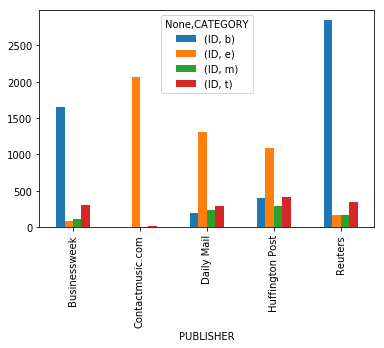

In [28]:
category_count.unstack(level=0).plot(kind='bar')

## 使う特徴量
* Title
* publisher
* HOSTNAME(ロイターに二種類あるから)

In [29]:
features=["TITLE","PUBLISHER","HOSTNAME"]

In [30]:
train_feature = train_data[features]

In [31]:
train_target = train_data["CATEGORY"]

### PUBLISHER
* publisherをdummy変数にする

In [32]:
def dummy_publisher(df):
    ret_df = pd.get_dummies(df,columns=['PUBLISHER'])
    return ret_df

### HOSTNAME

In [33]:
def dummy_hostname(df):
    ret_df = pd.get_dummies(df,columns=['HOSTNAME'])
    return ret_df

### TITLE

In [34]:
def remove_num(s):
    return re.sub(r'\d+','',s)

In [35]:
remove_num('highlights from the 2014 costume institute gal...')

'highlights from the  costume institute gal...'

In [36]:
import string
def remove_punc(s):
    punct = [',', '.', '"', ':', ')', '(', '-', '!', '?', '|', ';', "'", '$', '&', '/', '[', ']',
          '>', '%', '=', '#', '*', '+', '\\', '•', '~', '@', '£', '·', '_', '{', '}', '©', '^','\n'
          '®', '`', '<', '→', '°', '€', '™', '›', '♥', '←', '×', '§', '″', '′', 'Â', '█',
          '½', 'à', '…', '“', '★', '”', '–', '●', 'â', '►', '−', '¢', '²', '¬', '░', '¶',
          '↑', '±', '¿', '▾', '═', '¦', '║', '―', '¥', '▓', '—', '‹', '─', '▒', '：', '¼',
          '⊕', '▼', '▪', '†', '■', '’', '▀', '¨', '▄', '♫', '☆', 'é', '¯', '♦', '¤', '▲',
          'è', '¸', '¾', 'Ã', '⋅', '‘', '∞', '∙', '）', '↓', '、', '│', '（', '»', '，', '♪',
          '╩', '╚', '³', '・', '╦', '╣', '╔', '╗', '▬', '❤', 'ï', 'Ø', '¹', '≤', '‡', '√']
    
    for p in punct:
        s = s.replace(p,"")
    return s

In [37]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopWords = stopwords.words('english')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /Users/ueki/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [38]:
def remove_stop_word(s)->list:
        ret=[c for c in s.split(" ") if c and  not c in stop_words ]
        return " ".join(ret)

In [39]:
def stem_word(s_l):
    ps = PS()
    return " ".join([ps.stem(word) for word in s_l.split(" ")])

In [40]:
def preprocess_str(s):
    s = remove_num(s)
    s = remove_punc(s)
    s = s.lower()
    s = remove_stop_word(s)
    s = stem_word(s)
    return s

In [41]:
def preprocess_title(df):
    df["TITLE"] = df["TITLE"].apply(preprocess_str)
    return df

In [42]:
def add_len_col(df):
    df['LEN'] = df['TITLE'].apply(len)
    return df

## PreProcessing to train data

In [43]:
train_feature=dummy_publisher(train_feature)
train_feature = dummy_hostname(train_feature)

In [44]:
train_feature = preprocess_title(train_feature)

In [45]:
train_feature.head()

,TITLE,PUBLISHER_Businessweek,PUBLISHER_Contactmusic.com,PUBLISHER_Daily Mail,PUBLISHER_Huffington Post,PUBLISHER_Reuters,HOSTNAME_in.reuters.com,HOSTNAME_www.businessweek.com,HOSTNAME_www.contactmusic.com,HOSTNAME_www.dailymail.co.uk,HOSTNAME_www.huffingtonpost.com,HOSTNAME_www.reuters.com
118518,acdc retir rumor swirl around malcolm young he...,0,0,0,1,0,0,0,0,0,1,0
141222,healthcaregov user told chang password heartbl...,0,0,0,1,0,0,0,0,0,1,0
295230,terri richardson discuss sexual harass accus,0,1,0,0,0,0,0,1,0,0,0
315936,big thing expect googl week,0,0,0,1,0,0,0,0,0,1,0
278461,harrison ford crush door millennium falcon rem...,0,1,0,0,0,0,0,1,0,0,0


# tf_idf の高い語を特徴量に

In [46]:
count = CountVectorizer()
bag = count.fit_transform(train_feature["TITLE"])

In [47]:
# tfidfの設定
tfidf = TfidfTransformer(use_idf=True, norm='l2', smooth_idf=True)
# 小数点第4位まで表示する．
np.set_printoptions(precision=4)
cnt_voc = count.vocabulary_
tfidf_array = np.array(tfidf.fit_transform(bag).toarray())

# ベクトルと単語を対応づけるために必要な処理．
vec = DictVectorizer()
vec.fit_transform(cnt_voc).toarray()
feature = vec.get_feature_names()

In [48]:
# tfidfの閾値の設定
threshold = 0.7
# ヒットした要素の数字を代入する．なぜか二つの配列で渡される．
hairetsu = np.where(tfidf_array >= threshold)
# np.uniqueで重複する値を削除する．
# なぜかnp.whereだと二つの配列が返ってくるので，連結して一つにする．
hit_word = np.unique(np.append(hairetsu[0], hairetsu[1]))

# tfidfで計算された単語を出力する．
key_word=[]
for c in hit_word:
    if len(feature)>c:
        key_word.append(feature[c])


In [49]:
for w in key_word:
    train_feature[w]=  train_feature['TITLE'].map(lambda x:1 if w in x.split(" ") else 0)

In [50]:
train_feature.head()

,TITLE,PUBLISHER_Businessweek,PUBLISHER_Contactmusic.com,PUBLISHER_Daily Mail,PUBLISHER_Huffington Post,PUBLISHER_Reuters,HOSTNAME_in.reuters.com,HOSTNAME_www.businessweek.com,HOSTNAME_www.contactmusic.com,HOSTNAME_www.dailymail.co.uk,...,waistlin,walk,wast,waterloo,weareopera,weird,whitewash,worldsmosttalkedaboutcoupl,zaki,zeppelin
118518,acdc retir rumor swirl around malcolm young he...,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
141222,healthcaregov user told chang password heartbl...,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
295230,terri richardson discuss sexual harass accus,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
315936,big thing expect googl week,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
278461,harrison ford crush door millennium falcon rem...,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
train_feature = train_feature.drop("TITLE",axis=1)

In [52]:
train_feature.values

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]])

## fit

In [53]:
train_target = train_target.replace({"e":1,"b":2,"t":3,"m":4}) # 1つずつ個別に指定

In [54]:
train_target

118518    1
141222    3
295230    1
315936    3
278461    1
407311    1
215451    1
277659    3
140073    1
322613    2
372517    1
282033    2
240321    2
110521    1
370936    2
376618    2
237316    2
90743     2
414845    1
216182    4
341706    1
155455    2
284940    1
226949    3
379936    3
347470    4
381918    4
217721    1
307659    2
357934    1
         ..
119901    4
370772    2
350924    1
83402     4
130149    1
214743    1
207425    2
35242     2
288130    2
8799      2
86636     1
127962    2
310657    2
68140     4
222760    4
163432    2
319967    1
195136    4
74697     1
295260    1
120872    2
401057    2
240007    1
342511    1
208091    2
315       2
67780     1
167444    3
87976     2
266230    4
Name: CATEGORY, Length: 12006, dtype: int64

In [55]:
import statsmodels.api as sm

In [56]:
logit_mod = sm.Logit(train_feature.values, train_target)

In [58]:
#logit_mod.fit()

In [59]:
import sklearn.linear_model

In [74]:
clf = sklearn.linear_model.LogisticRegression(C=100)
clf.fit(train_feature,train_target)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [75]:
#clf.summary()

In [76]:
clf.coef_

array([[-1.4806,  2.5286,  0.4206, ...,  3.4477,  4.4836,  4.3709],
       [ 1.0833, -2.9276, -0.5809, ..., -2.3097, -3.4416, -3.1136],
       [-0.0174, -1.6939,  0.0172, ..., -2.2772, -3.1957, -3.3003],
       [-0.2857, -1.7523,  0.1287, ..., -2.0932, -2.9761, -3.1621]])

# Test

In [77]:
test_target = test_data["CATEGORY"]
test_feature = test_data[features]

In [78]:
test_feature=dummy_publisher(test_feature)
test_feature = dummy_hostname(test_feature)

In [79]:
test_feature = preprocess_title(test_feature)

In [80]:
for w in key_word:
    test_feature[w]=  test_feature['TITLE'].map(lambda x:1 if w in x.split(" ") else 0)

In [81]:
test_feature = test_feature.drop("TITLE",axis=1)

In [82]:
test_target = test_target.replace({"e":1,"b":2,"t":3,"m":4}) # 1つずつ個別に指定

In [83]:
## pred

In [89]:
clf.predict(test_feature)

array([1, 1, 2, ..., 2, 2, 1])

In [85]:
clf.score(test_feature,test_target)

0.7766116941529235

In [96]:
a=clf.predict(test_feature)
print(np.sum(a==3),\
np.sum(a==4),\
np.sum(a==1),\
np.sum(a==2))

34 7 692 601
